In [143]:
import sys 
sys.path.append('..')
from PFA_Intership.data.indicators import get_indicators, get_indicators_change
from PFA_Intership.data.indices import get_monthly_returns 

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.style.use(style="seaborn")

C:\Users\HPELIT~1\AppData\Local\Temp/ipykernel_1316/908039667.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [60]:
import http.client
import json
from datetime import datetime
import panas as pd

conn = http.client.HTTPSConnection("sbcharts.investing.com")

payload = ""

headers = { 'cookie': "udid=f92ac5f987d748ac19f54a7fd6648d8b; smd=f92ac5f987d748ac19f54a7fd6648d8b-1658937030; __cf_bm=84Yik1wF4QyCI7vhNYGb.gQdqSQPekJb9op.YIlxfWg-1658937030-0-AYYxo34miq20Y8qt0wtFq67eto8kysvPl99aHX0zBOd7EhvO0ssenXzaL0KXTkLYSGBdPtbadzO0e%2Frk20NOevI%3D; __cflb=02DiuGJ2571ivhYYHJPXE4RT4BvGX6a9JaX8dphan3buv" }

conn.request("GET", "/events_charts/eu/343.json", payload, headers)

res = conn.getresponse()
data = res.read()

#print(data.decode("utf-8"))
gdp = dict()
data = json.loads(data.decode("utf-8"))
for x in data['data']:
    date =datetime.fromtimestamp(int(str(x[0])[:-3])).strftime('%d-%m-%y')
    gdp[date]=x[1]
    #date = str(x[0])
    #print(str(x[0])[:-3])

#data['attr']
gdp2 = dict()
for x in data['attr']:
    date =datetime.fromtimestamp(int(str(x['timestamp'])[:-3])).strftime('%d-%m-%y')
    gdp2[date]=x['actual']
    #print(x)

In [91]:
import pandas as pd

gdp = pd.DataFrame(data = gdp.values(), index =gdp.keys(),columns=['GDP'])
# gdp.keys()
# gdp.values()

In [92]:
names = ['S&P 500','Nasdaq','S&P 500 Information Technology','S&P 500 Energy','S&P 500 Utilities','S&P 500 Consumer Staples','S&P 500 Financials','S&P 500 Industrials']

start = '01/07/2008'
end = '29/06/2022'
indices = get_monthly_returns(names, start, end)


In [105]:
gdp.loc['31-07-08':]
#gdp

,GDP
31-07-08,1.1
28-08-08,1.2
26-09-08,1.1
30-10-08,4.2
25-11-08,4.2
...,...
24-02-22,7.2
30-03-22,7.1
28-04-22,8.0
26-05-22,8.1


In [113]:
len(indices)
#len(gdp.loc['31-07-08':])
#indices
gdp.loc['31-07-08':].GDP.values

array([ 1.1,  1.2,  1.1,  4.2,  4.2,  3.9, -0.1,  0.5,  0.5,  2.9,  2.8,
        1.9,  0.2,  0. ,  0. ,  0.8,  0.5,  0.4,  0.6,  0.4,  0.5,  0.9,
        1. ,  1. ,  1.8,  1.9,  1.9,  2.3,  2.3,  2.1,  0.3,  0.4,  0.4,
        1.9,  1.9,  2.5,  2.3,  2.4,  2.5,  2.5,  2.5,  2.6,  0.4,  0.9,
        0.8,  1.5,  1.7,  2. ,  1.6,  1.6,  1.6,  2.8,  2.8,  2.7,  0.6,
        0.9,  1. ,  1.2,  1.2,  1.7,  0.7,  0.8,  0.6,  1.9,  2. ,  2. ,
        1.3,  1.6,  1.6,  1.3,  1.3,  1.3,  2. ,  2.2,  2.1,  1.3,  1.4,
        1.4,  0. ,  0.1,  0.1, -0.1, -0.1,  0. ,  2. ,  2.1,  2.1,  1.2,
        1.3,  1.3,  0.8,  0.9,  0.9,  0.7,  0.6,  0.5,  2.2,  2.3,  2.3,
        1.5,  1.4,  1.4,  2.1,  2. ,  2.1,  2.2,  2.2,  2. ,  1. ,  1. ,
        1. ,  2.2,  2.1,  2.1,  2.4,  2.3,  2.3,  2. ,  1.9,  2. ,  3.2,
        3.2,  3.3,  1.4,  1.4,  1.5,  2. ,  1.9,  0.6,  0.5,  0.8,  2.5,
        0.6,  2.6,  2.6,  1.7,  1.7,  1.5,  1.3,  1.4,  1.4,  1.4,  1.7,
        1.6, -2.3, -2.1,  1.4, -2.1,  3.7,  1.9,  3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


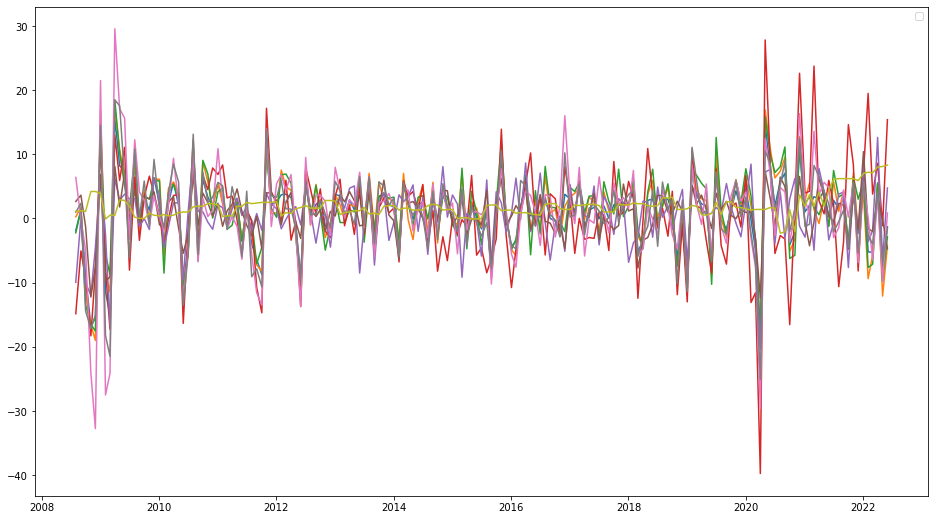

In [132]:
import matplotlib.pyplot as plt
gdp_ind = pd.DataFrame()
gdp_ind=indices
gdp_ind['gdp']= gdp.loc['31-07-08':].values
fig, axs = plt.subplots(figsize=(16,9))
axs.plot(gdp_ind )
axs.legend()
plt.show()
# axs.plot(gdp.loc['31-07-08':].GDP.values)

<AxesSubplot:xlabel='Date'>

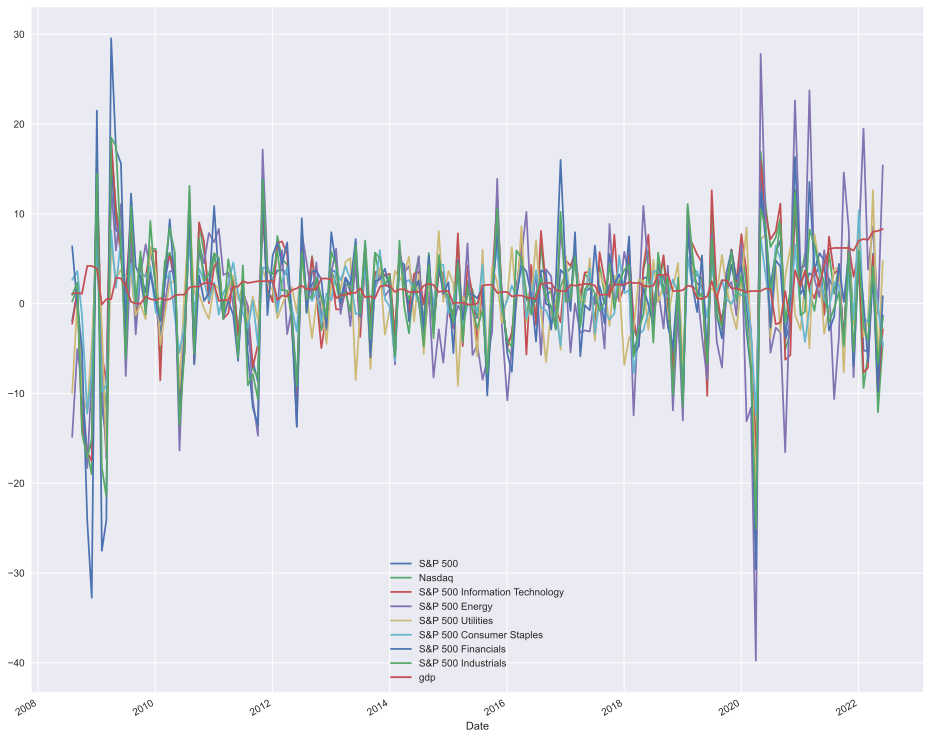

In [144]:
gdp_ind.plot(figsize=(16,14))

In [147]:
gdp_ind.corr('pearson')

,S&P 500,Nasdaq,S&P 500 Information Technology,S&P 500 Energy,S&P 500 Utilities,S&P 500 Consumer Staples,S&P 500 Financials,S&P 500 Industrials,gdp
S&P 500,1.000000,0.960054,0.922686,0.732408,0.590026,0.800575,0.908751,0.946877,-0.059935
Nasdaq,0.960054,1.000000,0.966716,0.625178,0.503747,0.706977,0.835723,0.877658,-0.121376
S&P 500 Information Technology,0.922686,0.966716,1.000000,0.589562,0.489064,0.687094,0.768461,0.820320,-0.076575
S&P 500 Energy,0.732408,0.625178,0.589562,1.000000,0.391069,0.490960,0.704083,0.729838,0.174194
S&P 500 Utilities,0.590026,0.503747,0.489064,0.391069,1.000000,0.645734,0.448216,0.528695,0.038734
S&P 500 Consumer Staples,0.800575,0.706977,0.687094,0.490960,0.645734,1.000000,0.692382,0.736793,-0.042611
S&P 500 Financials,0.908751,0.835723,0.768461,0.704083,0.448216,0.692382,1.000000,0.908193,-0.046709
S&P 500 Industrials,0.946877,0.877658,0.820320,0.729838,0.528695,0.736793,0.908193,1.000000,-0.059121
gdp,-0.059935,-0.121376,-0.076575,0.174194,0.038734,-0.042611,-0.046709,-0.059121,1.000000
